# Lane detecting using opencv

This is a small portion of code that can be used to identify lanes so that the self-driving car can move in a particular direction.

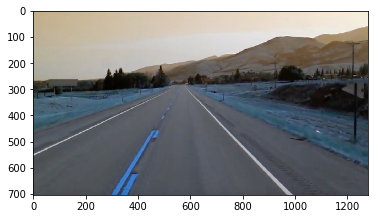

In [1]:
# -*- coding: utf-8 -*-
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
lane_image  = cv2.imread("test_image.png")
plt.imshow(lane_image)
plt.show()



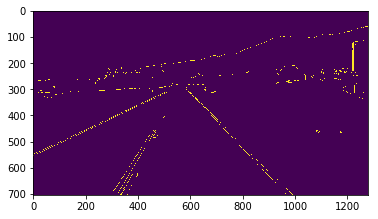

In [22]:
# using canny edge detection technique.
''' Goal is to identify sharp changes in intensity of adjacent pixels.'''
    
# converting the image into grayscale .
gray = cv2.cvtColor(lane_image, cv2.COLOR_BGR2GRAY)
# reducing noise by blur.
blur = cv2.GaussianBlur(gray , (5,5),0)
canny = cv2.Canny(blur , 50 , 150) # image, lower and upper bound
plt.imshow(canny)
plt.show()


In [3]:
# Masking the image with a triangular polygon for finding region of interest.
height  = lane_image.shape[0]
height

704

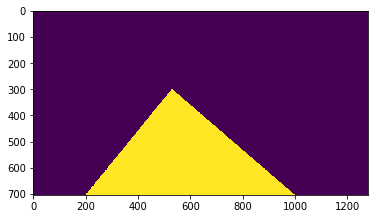

In [23]:
# Triangular polygon coordinates.
polygons = np.array([
    [
        (200, height), (1000, height), (530 , 300)
    ]
])
mask = np.zeros_like(canny)
cv2.fillPoly(mask , polygons, 255) # Fills the polygon with colored pixels.
plt.imshow(mask)


# bitwise AND
Computing the bitwise & of both images takes the bitwise & of each homologous pixel in both arrays, ultimately masking the canny image to only show the region of interest traced by the polygonal contour of the mask.

<function matplotlib.pyplot.show(*args, **kw)>

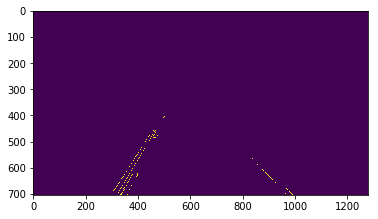

In [24]:
masked_image = cv2.bitwise_and(canny, mask)
plt.imshow(masked_image)
plt.show

# Hough Transform

For identifying lane lines in an image.

1. split Huff's space into a grid
2. For every point of intersection we're going to cast a vote inside of the bin that it belongs to the bin with the maximum number of votes that's going to be the line.

In [25]:
lines = cv2.HoughLinesP(masked_image , 2, np.pi/180, 100, np.array([]), minLineLength = 40, maxLineGap  = 3) # here 2 pixels with 1 degree precision.
line_image = np.zeros_like(lane_image)
if lines is not None:
    for line in lines:
        print(line)

[[382 599 430 519]]
[[398 548 455 460]]
[[825 553 969 702]]
[[320 703 380 602]]
[[356 613 395 553]]
[[330 653 362 605]]


The above result represents:
each line is a 2D array containing our line coordinates in the form [[x1,y1,x2,y2]]. These coordinates specify the line's paraameters, as well as the location of the lines with respect to the image space, ensuring that they are placed in the correct position.

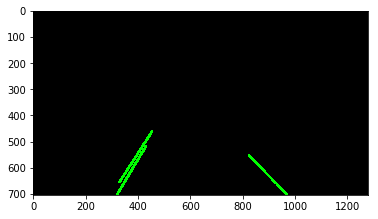

In [26]:
# refinfing the lines with corrdinate space
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        cv2.line(line_image, (x1, y1), (x2,y2), (0, 255,0), 10)
plt.imshow(line_image)

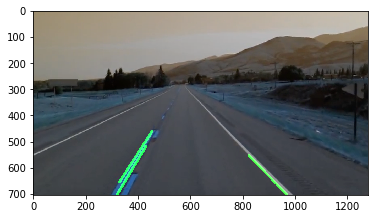

In [27]:
# better define the lines with blending.
blend_image = cv2.addWeighted(lane_image, 0.8, line_image,1,1)
plt.imshow(blend_image)
plt.show()


The lanes are found and are displayed with green color. we can optimize the line by averaging futher for smoother curve.